In [1]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exercício 1

In [2]:
N = 400

In [3]:
class_0 = Data(mu=(2,  3), std=(.8,  2.5), n=N)
class_1 = Data(mu=(5,  6), std=(1.2, 1.9), n=N)
class_2 = Data(mu=(8,  1), std=(.9,   .9), n=N)
class_3 = Data(mu=(15, 4), std=(.5,  2.0), n=N)

In [ ]:
x0, y0 = class_0.sample_initialize()
x1, y1 = class_1.sample_initialize()
x2, y2 = class_2.sample_initialize()
x3, y3 = class_3.sample_initialize()

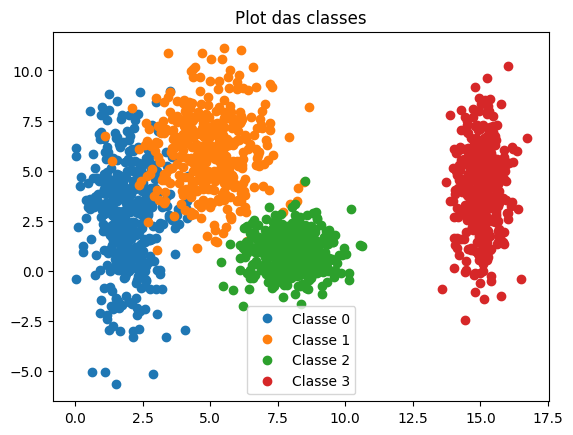

In [5]:
plt.plot(x0, y0, "o", label="Classe 0")
plt.plot(x1, y1, "o", label="Classe 1")
plt.plot(x2, y2, "o", label="Classe 2")
plt.plot(x3, y3, "o", label="Classe 3")

plt.legend()

plt.title("Plot das classes")

plt.show()

## Exercício 2

In [6]:
mu_A = np.array([0, 0, 0, 0, 0])
cov_A = np.array([[1.0, 0.8, 0.1, 0.0, 0.0],
                  [0.8, 1.0, 0.3, 0.0, 0.0],
                  [0.1, 0.3, 1.0, 0.5, 0.0],
                  [0.0, 0.0, 0.5, 1.0, 0.2],
                  [0.0, 0.0, 0.0, 0.2, 1.0]])

mu_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])
cov_B = np.array([[ 1.5, -0.7, 0.2, 0.0, 0.0],
                  [-0.7,  1.5, 0.4, 0.0, 0.0],
                  [ 0.2,  0.4, 1.5, 0.6, 0.0],
                  [ 0.0,  0.0, 0.6, 1.5, 0.3],
                  [ 0.0,  0.0, 0.0, 0.3, 1.5]])

class_A = MultiDimensionData(mu=mu_A, cov=cov_A, n=500)
class_B = MultiDimensionData(mu=mu_B, cov=cov_B, n=500)

In [7]:
# Geração dos dados
sample_A = class_A.sample_initialize()
sample_B = class_B.sample_initialize()

dataset = np.concatenate((sample_A, sample_B))

In [8]:
# Matriz de covariância
mat = np.cov(dataset, rowvar=False)

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(mat)

In [10]:
idx = np.argsort(eigenvalues)[::-1] # Obtém os índices que ordenariam o vetor e inverte a lista
eigenvalues = eigenvalues[idx] # Ordena a lista de autovalores
eigenvectors = eigenvectors[:, idx] # Ordena a lista de autovetores (colunas)

In [11]:
# Obtém os dois principais autovetores (para PC1 e PC2)
pcs = eigenvectors[:, :2] # matrix 5x2

In [12]:
# Centralizar o dataset original 
dataset_mu = dataset.mean(axis=0) # matriz 1000x5
dataset_cent = dataset - dataset_mu

In [13]:
Z = dataset_cent @ pcs # (1000,5) x (5, 2)

In [14]:
labels_A = np.zeros(500, dtype=int)
labels_B = np.ones(500, dtype=int)

y = np.concatenate((labels_A, labels_B))

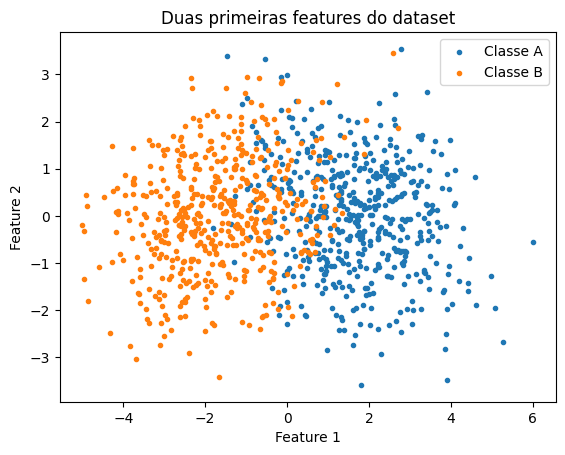

In [15]:
plt.scatter(Z[y==0, 0], Z[y==0, 1], label='Classe A', marker=".") # Plot da classe A
plt.scatter(Z[y==1, 0], Z[y==1, 1], label='Classe B', marker=".") # Plot da classe B

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.title("Duas primeiras features do dataset")
plt.show()

## Exercício 3

In [16]:
folder_path = "./data/spaceship-titanic/"

train_file = "train.csv"
test_file = "test.csv"

In [17]:
data_train = pd.read_csv(folder_path + train_file)
data_test = pd.read_csv(folder_path + test_file)

In [18]:
df = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [19]:
null_values = df.isna().sum()

In [20]:
null_values_no_target = null_values.drop(["Transported", "Name"])

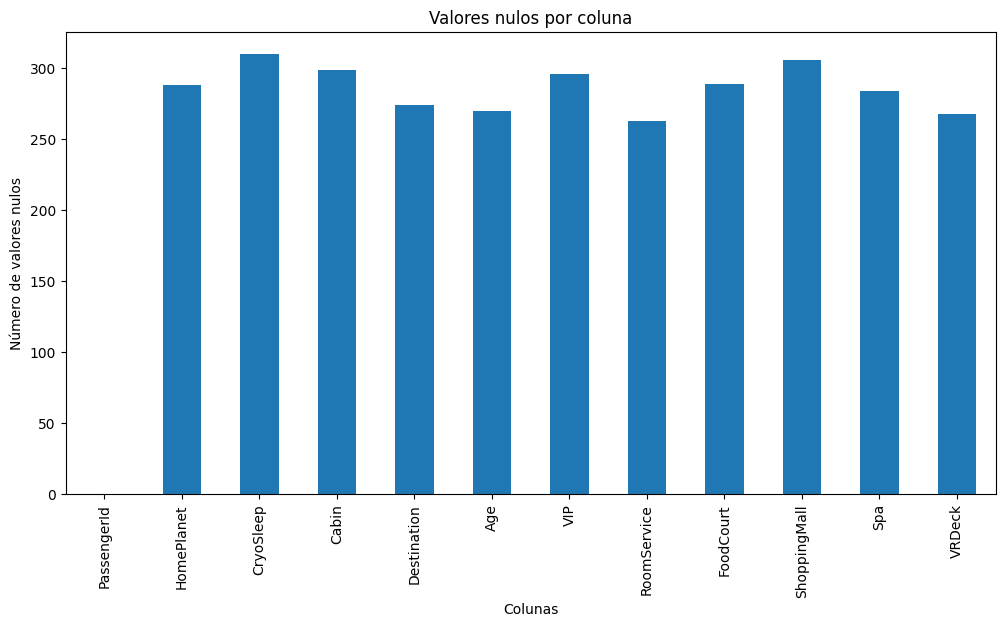

In [21]:
null_values_no_target.plot(kind="bar", figsize=(12, 6))

plt.xlabel("Colunas")
plt.ylabel("Número de valores nulos")

plt.title("Valores nulos por coluna")

plt.show()

In [22]:
# Criando colunas para cada uma das informações da cabine
df["CabinDeck"] = np.nan
df["CabinNum"] = np.nan
df["CabinSide"] = np.nan

In [23]:
for i in range(len(df["Cabin"])):
    if isinstance(df.loc[i, "Cabin"], str):
        df.loc[i, "CabinDeck"] = str(df.loc[i, "Cabin"].split("/")[0])
        df.loc[i,  "CabinNum"] = np.int64(df.loc[i, "Cabin"].split("/")[1])
        df.loc[i, "CabinSide"] = str(df.loc[i, "Cabin"].split("/")[2])

    if df.loc[i, "Cabin"] == np.nan:
        df.loc[i, "CabinDeck"] = np.nan
        df.loc[i,  "CabinNum"] = np.nan
        df.loc[i, "CabinSide"] = np.nan

C:\Users\Kadu\AppData\Local\Temp\ipykernel_28636\4140316591.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'B' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, "CabinDeck"] = str(df.loc[i, "Cabin"].split("/")[0])
C:\Users\Kadu\AppData\Local\Temp\ipykernel_28636\4140316591.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'P' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, "CabinSide"] = str(df.loc[i, "Cabin"].split("/")[2])


In [24]:
df = df.drop(columns=["Cabin", "Name", "PassengerId"])

In [25]:
categorical = [
    "HomePlanet", "CryoSleep", "Destination", "VIP", "Transported", "CabinDeck", "CabinSide"
]

numerical = [
    "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "CabinNum"
]

In [26]:
values_cat = {}
values_num = {}

# Usando a moda (valor que mais aparece) para features categóricas
for cat in categorical:
    values_cat[cat] = df[cat].mode()[0]

# Usando a mediana para features numéricas
for num in numerical:
    values_num[num] = df[num].median()

In [27]:
# Dataset com colunas de features relevantes sem valores nulos
df_no_nan = df.fillna(value=values_cat).fillna(value=values_num)

C:\Users\Kadu\AppData\Local\Temp\ipykernel_28636\1826850816.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_no_nan = df.fillna(value=values_cat).fillna(value=values_num)


In [28]:
one_hot_encoding = ["HomePlanet", "Destination", "CabinDeck", "CabinSide"]

In [29]:
# categorical
df_no_nan["CryoSleep"] = df_no_nan["CryoSleep"].astype("int8")
df_no_nan["VIP"] = df_no_nan["VIP"].astype("int8")
df_no_nan["Transported"] = df_no_nan["Transported"].astype("int8")

# numerical
df_no_nan["CabinNum"] = df_no_nan["CabinNum"].astype("int64")

In [30]:
for label in one_hot_encoding:
    dummy = pd.get_dummies(df_no_nan[label], prefix=label, dtype=int)
    df_no_nan = pd.concat([df_no_nan.drop(columns=[label]), dummy], axis=1)

In [31]:
df_no_nan

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNum,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,1496,...,0,0,0,0,0,0,1,0,0,1
12966,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,431,...,0,0,0,0,0,1,0,0,0,1
12967,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,296,...,0,0,0,1,0,0,0,0,1,0
12968,0,27.0,0,0.0,2680.0,0.0,0.0,523.0,1,297,...,0,0,0,1,0,0,0,0,1,0


In [32]:
for num in numerical:
    zscore_mean = df_no_nan[num].mean()
    zscore_std = df_no_nan[num].std(ddof=0)

    df_no_nan[num] = (df_no_nan[num] - zscore_mean) / zscore_std

In [33]:
df_no_nan

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNum,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,0.720932,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,0,-1.181321,...,0,1,0,0,0,0,0,0,1,0
1,0,-0.332557,0,-0.170439,-0.276082,-0.249566,0.221040,-0.219449,1,-1.181321,...,0,0,0,0,0,1,0,0,0,1
2,0,2.055350,1,-0.273285,1.998823,-0.292365,5.732776,-0.215170,0,-1.181321,...,1,0,0,0,0,0,0,0,0,1
3,0,0.299536,0,-0.340290,0.536429,0.342766,2.706059,-0.091947,0,-1.181321,...,1,0,0,0,0,0,0,0,0,1
4,0,-0.894417,0,0.131863,-0.237179,-0.033861,0.235342,-0.255389,1,-1.179351,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,0.369769,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,1,1.765958,...,0,0,0,0,0,0,1,0,0,1
12966,0,0.931629,0,-0.340290,0.258364,-0.263262,-0.260768,-0.133877,1,-0.332205,...,0,0,0,0,0,1,0,0,0,1
12967,1,-0.121859,0,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100,1,-0.598169,...,0,0,0,1,0,0,0,0,1,0
12968,0,-0.121859,0,-0.340290,1.427386,-0.292365,-0.269707,0.190440,1,-0.596199,...,0,0,0,1,0,0,0,0,1,0


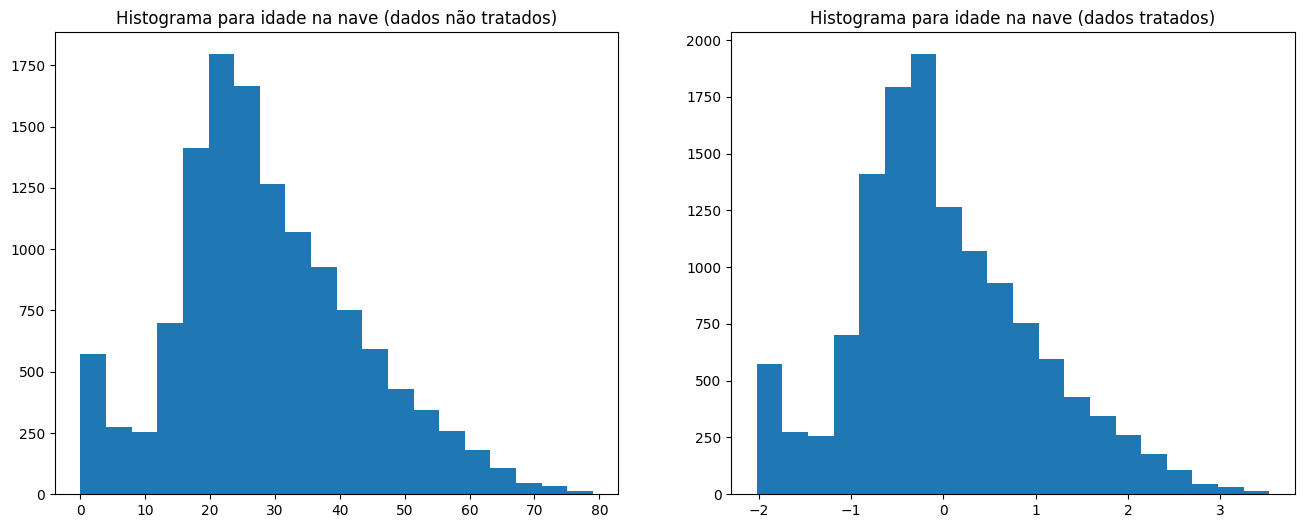

In [63]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["Age"], bins=20)
plt.title("Histograma para idade na nave (dados não tratados)")

plt.subplot(122)
plt.hist(df_no_nan["Age"], bins=20)
plt.title("Histograma para idade na nave (dados tratados)")

plt.show()

In [ ]:
# sem os valores nulos, podemos observar que existe uma grande concentração de pessoas que possuíam cerca de 25 anos durante a viagem

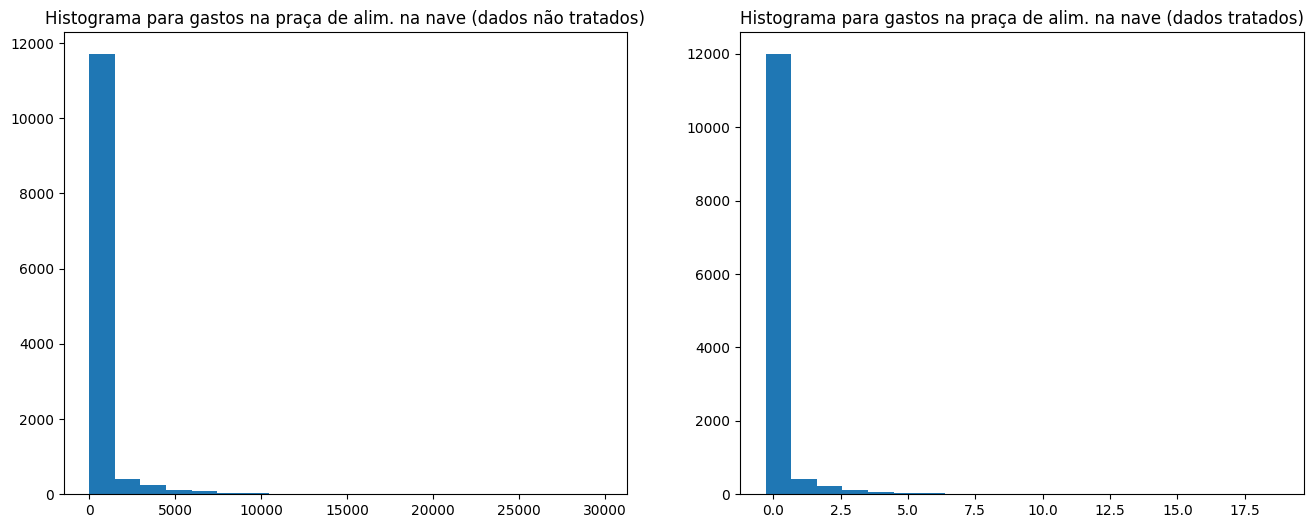

In [69]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["FoodCourt"], bins=20)
plt.title("Histograma para gastos na praça de alim. na nave (dados não tratados)")

plt.subplot(122)
plt.hist(df_no_nan["FoodCourt"], bins=20)
plt.title("Histograma para gastos na praça de alim. na nave (dados tratados)")


plt.show()

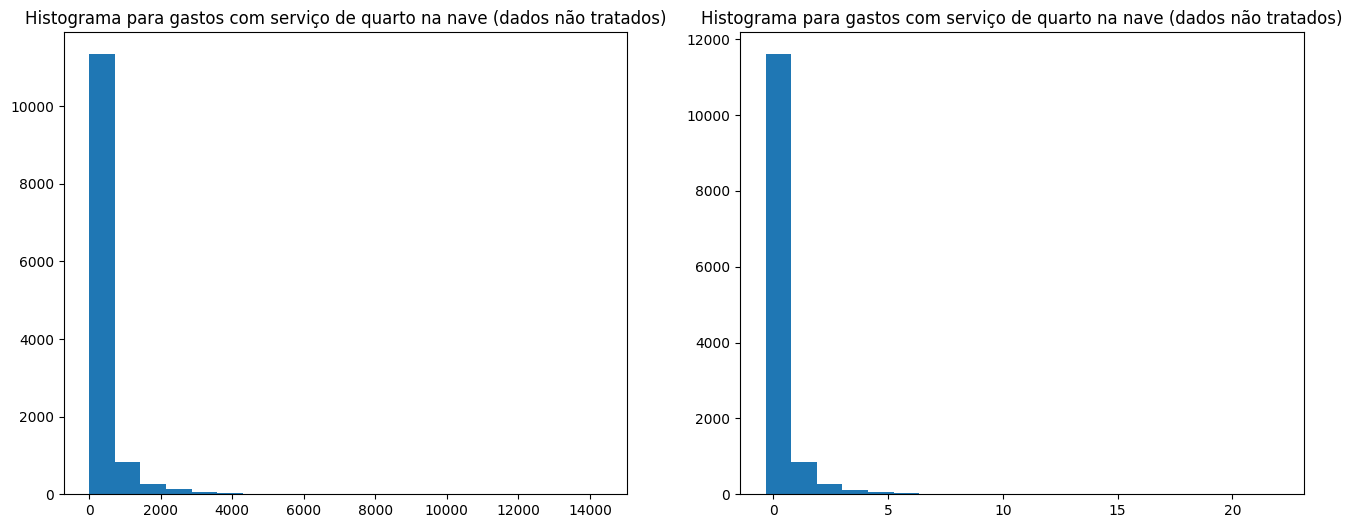

In [71]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["RoomService"], bins=20)
plt.title("Histograma para gastos com serviço de quarto na nave (dados não tratados)")

plt.subplot(122)
plt.hist(df_no_nan["RoomService"], bins=20)
plt.title("Histograma para gastos com serviço de quarto na nave (dados não tratados)")

plt.show()